# Supervised Learning Methods (auxiliary Notebook)

HFT KI Workshop, Michael Mommert, University of St. Gallen

## Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

we define a function that also adds some noise to its output:

In [3]:
def f(x):
    """any function"""
    return x**3 - x**2

In [4]:
np.random.seed(42)

xs = np.random.rand(10)
noise = np.random.normal(loc=0, scale=0.01, size=xs.size)
ys = f(xs) + noise

let's plot the output:

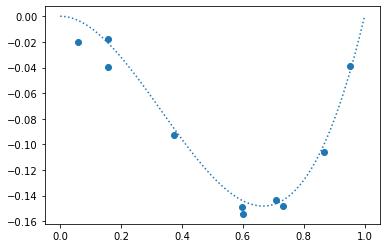

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(xs, ys)
ax.plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')

fig.savefig('polynomial_fit.png', dpi=300)

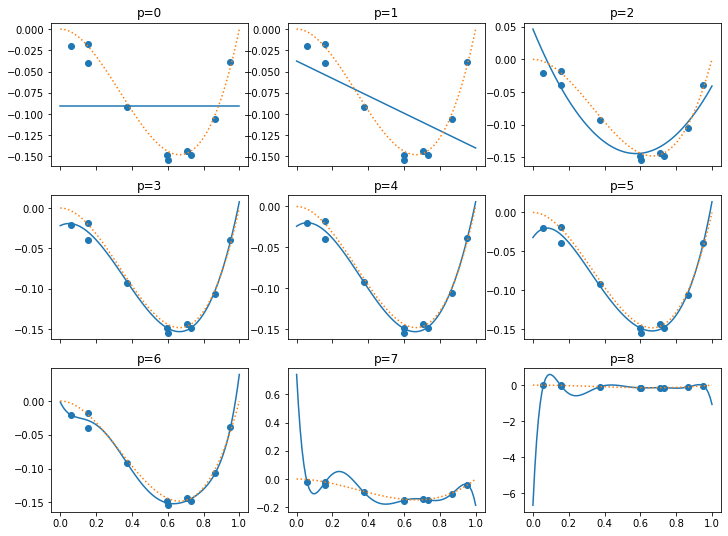

In [6]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(12, 9))
ax = np.ravel(ax)

for i in range(9):
    y_fit = np.polyval(np.polyfit(xs, ys, i), np.linspace(0, 1, 100))

    ax[i].scatter(xs, ys)
    ax[i].plot(np.linspace(0, 1, 100), y_fit)
    ax[i].plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')
    ax[i].set_title("p={}".format(i))

plt.savefig('polynomial_fit_orders.png', dpi=300)

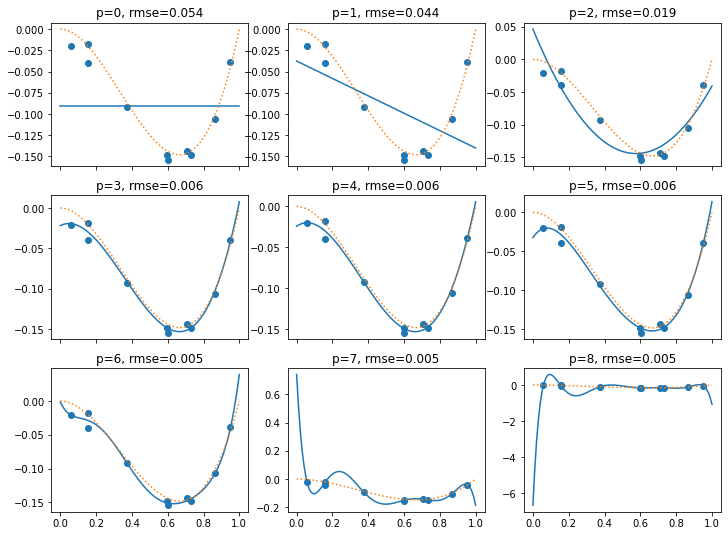

In [7]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(12, 9))
ax = np.ravel(ax)

for i in range(9):
    y_fit = np.polyval(np.polyfit(xs, ys, i), np.linspace(0, 1, 100))

    rmse = np.sqrt(np.mean((np.polyval(np.polyfit(xs, ys, i), xs) - ys)**2))

    ax[i].scatter(xs, ys)
    ax[i].plot(np.linspace(0, 1, 100), y_fit)
    ax[i].plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')
    ax[i].set_title("p={}, rmse={:.3f}".format(i, rmse))

plt.savefig('polynomial_fit_rmse.png', dpi=300)

## Ridge Regression

overfitting example:

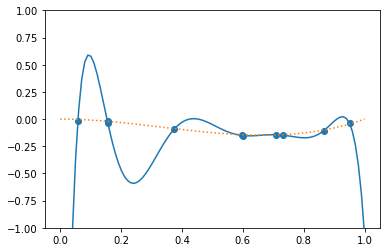

In [8]:
plt.scatter(xs, ys)
plt.plot(np.linspace(0, 1, 100), y_fit)
plt.plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')
plt.ylim([-1, 1])
plt.savefig('polynomial_overfit.png', dpi=300)



applying ridge regression on our univariate dataset for different values of $\alpha$:

/home/mommermi/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


alpha=0.0e+00, sum coeffs^2=9.7e+14, rmse=0.005
alpha=1.0e-05, sum coeffs^2=3.0e+06, rmse=0.006
alpha=1.0e-04, sum coeffs^2=3.2e+04, rmse=0.006
alpha=1.0e-03, sum coeffs^2=3.7e+02, rmse=0.006
alpha=1.0e-02, sum coeffs^2=4.3e+00, rmse=0.007
alpha=1.0e-01, sum coeffs^2=5.3e-02, rmse=0.007
alpha=1.0e+00, sum coeffs^2=1.1e-03, rmse=0.011
alpha=1.0e+01, sum coeffs^2=1.2e-04, rmse=0.035
alpha=1.0e+02, sum coeffs^2=5.1e-06, rmse=0.072


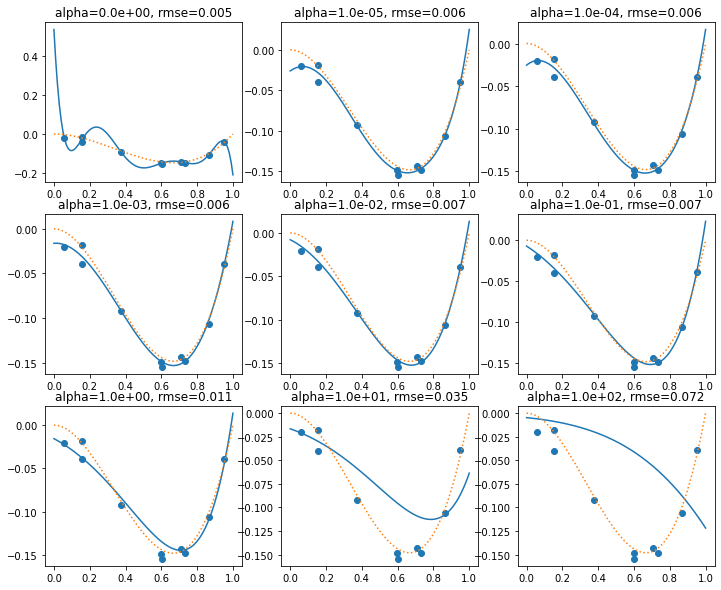

In [23]:
from sklearn.kernel_ridge import KernelRidge

fig, ax = plt.subplots(3, 3, figsize=(12, 10))
ax = np.ravel(ax)

alphas = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
coeff_sum = []
rmses = []
for i, alpha in enumerate(alphas):
    model = KernelRidge(kernel='polynomial', degree=8, alpha=alpha)
    model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

    rmse = np.sqrt(np.mean((model.predict(xs.reshape(-1, 1)).reshape(-1) - ys)**2))

    ax[i].scatter(xs, ys)
    ax[i].plot(np.linspace(0, 1, 100), model.predict(np.linspace(0, 1, 100).reshape(-1, 1)))
    ax[i].plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')
    ax[i].set_title('alpha={:.1e}, rmse={:.3f}'.format(alpha, rmse))

    print('alpha={:.1e}, sum coeffs^2={:.1e}, rmse={:.3f}'.format(alpha, np.sum(model.dual_coef_**2), rmse))
    coeff_sum.append(np.sum(model.dual_coef_**2))
    rmses.append(rmse)


plt.savefig('polynomial_fit_ridgeregression.png', dpi=300)

Text(0, 0.5, 'log(coefficient sum)')

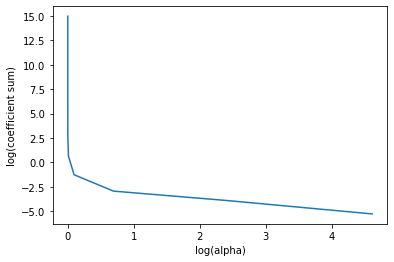

In [24]:
plt.plot(np.log1p(np.array(alphas)+1e-15), np.log10(coeff_sum))
plt.xlabel('log(alpha)')
plt.ylabel('log(coefficient sum)')

coefficients:

In [26]:
model = KernelRidge(kernel='polynomial', degree=8, alpha=1e-4)
model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))
np.ravel(model.dual_coef_)

array([  11.66833908,    9.74779792,   -9.42834909,    1.5757604 ,
        109.20665538, -106.30502787,   -3.63682635,  -28.56414815,
        -53.43879377,   69.14911679])

## Lasso regression

applying Lasso regression over our univariate dataset for different values of $\alpha$:

/home/mommermi/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
/home/mommermi/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/mommermi/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021949044567061576, tolerance: 2.9155788879536357e-06
  positive)
/home/mommermi/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5942325671873e-05

alpha=0.0e+00, sum coeffs^2=2.9e-01, rmse=0.007
alpha=1.0e-05, sum coeffs^2=2.0e-01, rmse=0.007
alpha=5.0e-05, sum coeffs^2=1.1e-01, rmse=0.008
alpha=1.0e-04, sum coeffs^2=1.2e-01, rmse=0.008
alpha=5.0e-04, sum coeffs^2=1.2e-01, rmse=0.010
alpha=1.0e-03, sum coeffs^2=7.8e-02, rmse=0.014


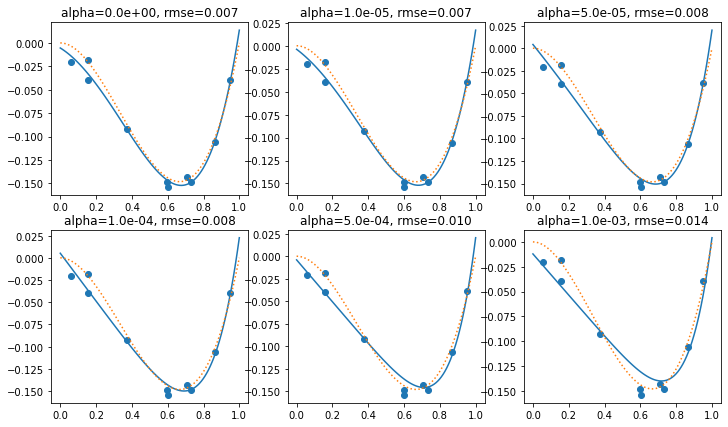

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(8)
xs_poly = poly.fit_transform(xs.reshape(-1, 1), ys.reshape(-1, 1))

fig, ax = plt.subplots(2, 3, figsize=(12, 7))
ax = np.ravel(ax)

for i, alpha in enumerate([0, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3]):
    model = Lasso(alpha=alpha, fit_intercept=True)
    model.fit(xs_poly, ys.reshape(-1, 1))

    rmse = np.sqrt(np.mean((model.predict(xs_poly) - ys)**2))

    ax[i].scatter(xs, ys)
    ax[i].plot(np.linspace(0, 1, 100), model.predict(poly.transform(np.linspace(0, 1, 100).reshape(-1, 1))))
    ax[i].plot(np.linspace(0, 1, 100), f(np.linspace(0, 1, 100)), ls='dotted')
    ax[i].set_title('alpha={:.1e}, rmse={:.3f}'.format(alpha, rmse))

    print('alpha={:.1e}, sum coeffs^2={:.1e}, rmse={:.3f}'.format(alpha, np.sum(model.coef_**2), rmse))

plt.savefig('polynomial_fit_lasso.png', dpi=300)


In [19]:
model = Lasso(alpha=1e-4, fit_intercept=True)
model.fit(xs_poly, ys.reshape(-1, 1))
model.coef_


#np.sum(model.coef_* poly.transform(np.linspace(0, 1, 10).reshape(-1, 1)).reshape(10, -1), axis=1)-model.predict(poly.transform(np.linspace(0, 1, 10).reshape(-1, 1)))+model.intercept_

/home/mommermi/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0639127268320453e-05, tolerance: 2.9155788879536357e-06
  positive)


array([ 0.        , -0.26944121, -0.        ,  0.        ,  0.        ,
        0.0283306 ,  0.2160724 ,  0.04250675,  0.        ])